# Computer Based Mushroom Identification
---

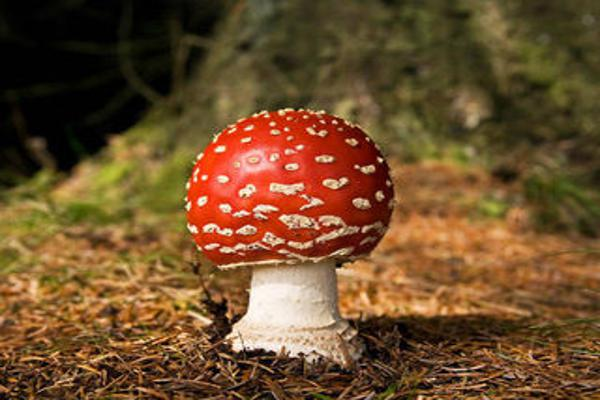

## Abstract
---

This project explores common convolutional neural network (CNN) architectures in order to build a computer vision model to classify a mushroom as belonging to one of six species based on its picture. Four of the species are edible and two are posionous look-a-like species. The best performing model is a ResNet50 architecture with weights pre trained to the Image Net dataset. Three dense layers, two drop out layers, and a batch normalization layer were added to the top of this ResNet50's core layers. These top layers were trained, and then the top 75 layers of the ResNet50's core layers were fine-tuned using the mushroom images while implementing data augmentation. The final model yields validation accuracy of 92.4% and yields 93.1% accuracy on the test image set. For mushroom classification, 92.4% classification accuracy is too low to safely rely on. Therefore, a "prediction certainty threshold" was implemented which showed that of the predictions for which the model has assigned a 75% or higher probability, 96% of those test images were correctly classified. This prediction certainty threshold increased the classification accuracy at the cost of 8.6% of the test images being bucketed as 'uncertain classification'. When looking at the confusion matrix, there are still a few misclassifications that classified a poisonous mushroom as being edible, but this happens less than before implementing the 'uncertain classification' bucketing. After viewing the images with the highest prediction probabilities and the lowest prediction probabilities, it is clear that the accuracy could be increased with a higher quality image data set. If all images showed the mushroom as the main focus of the picture (not pictures taken from a distance), and showed all portions of the mushroom (stalk, head, and underside of head), then I am confident that a model with a much higher accuracy could be trained.

## Introduction
---

There is a large demand for wild mushrooms in restaurants across the world. In North America and Europe in particular, wild mushrooms are in high demand in up-scale restaurants. Since wild mushrooms cannot be bought at a grocery store, restaurants often buy mushrooms from local harvesters. Restaurants rely on the correct classification of these mushrooms by the people harvesting them.

## Research Question
---

One restaurant in particular has dealt with buying incorrectly classified mushrooms from a local harvester, so the customers who ordered the dish containing these mushrooms got sick. The manager of the restaurant was considering taking wild mushrooms off the menu, but realized how popular they were with the customers, so decided not to. Instead, the manager decided to implement a round of mushroom identification checking, so the restaurant isn't completely trusting the harvesters classification, but rather verifying it. However, since none of the staff has any experience in identifying mushrooms, and it isn't viable to hire a mushroom specialist long term, the manager has hired our Data Science firm to build a computer vision model to sort through harvested mushrooms and independently verify their classification.

## Data
---

This project uses a data set from [a github user](https://github.com/bechtle/mushroomobser-dataset). The author has written code to scrape images from [mushroom observer](https://mushroomobserver.org/), which contains user contributed images of mushrooms by species. I used images previously scraped by the author for this project found on a [dropbox link](https://www.dropbox.com/sh/m1o91dwd1nto6w0/AADACdc0WF_oIAyKN5W1UvDta/images_files/complete_dataset/TRAIN_2006-2015?dl=0&subfolder_nav_tracking=1) from user contributions between 2006 and 2015. I chose to study the mushrooms used in the restaurant, which includes the Amanita Muscaria (Fly Agaric), Russula Mariae (Mary Russula), Boletus Edulis (Penny Bun), and Cantharellus (Chanterelle). In addition, for the species listed above, I have also chosen to include the common poisonous look-a-likes for the applicable mushroom species. The very poisonous look-a-like for Amanita Muscaria is Amanita Bisporigera (Destroying Angel). For Cantharellus, the less poisonous look-a-like is Omphalotus Olearius (Jack-O-Lantern). The number of images used in this project (after sorting out useless images) is shown below. After containing these images in a zip file, they take up 55.1 MB of space. I uploaded the data to [my kaggle account](https://www.kaggle.com/harperd17/mushroom-pictures-sorted) in order to make accessing the data through Google Colab easier.

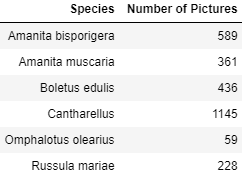

<b>Figure 1:</b> The table above shows the different kinds of mushrooms used in this project, as well as how many pictures were available. The species Cantharellus has by far the most pictures, and the species Ompalotus olearius has by far the least.

## Exploratory Data Analysis and Data Cleaning
---

When sorting through the set of images, I had to remove many from the data set due to the lack of relevance to this project. For example, many images were a view of a piece of mushroom through a microscope. Some images didn't have a mushroom in them at all. Some images showed someone walking on a trail, a large bird in a tree, a bush, and other things besides mushrooms. Since this data set is made of pictures people contribute, it's likely that these pictures were taken on the mushroom "hunt" and were uploaded with the actual mushroom pictures. Images like this were removed because they have no relevance to a mushroom classification model. Examples of images removed are shown below.

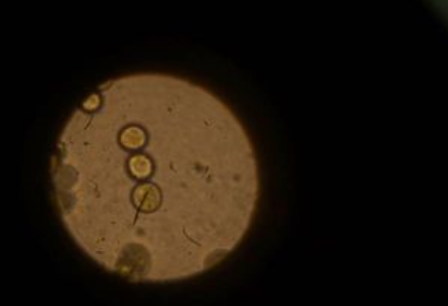

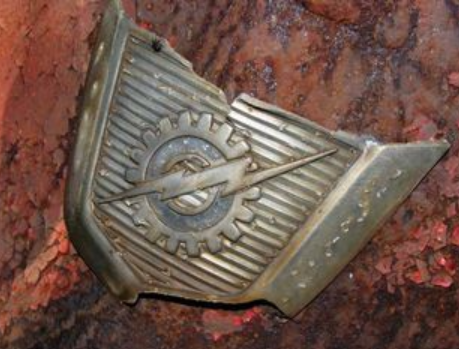

<b>Figure 2: </b>The above images are samples from the images removed from the dataset. The top image is a picture of a piece of mushroom under a microscope. The bottom image is a shield, or a car part (I'm not entirely sure).

A quick sample of images by species can be seen below. It is interesting to note that some of these pictures have multiple mushrooms in them as well as different mushrooms showcasing different parts. For example, some mushroom pictures are taken from above and other pictures are taken from the side while other pictures are taken from below to showcase the underside of the mushroom cap. Lastly, some pictures are of a mushroom that has been cut vertically in half. This is probably because the flesh from some mushrooms changes colors when cut, or sometimes cutting the mushroom in half exposes a crucial structure to the mushroom for identification. Lastly, some of the images are not a close up of the mushroom. For example, in the fourth image under Amanita muscaria, the mushroom takes up a very small portion of the image.

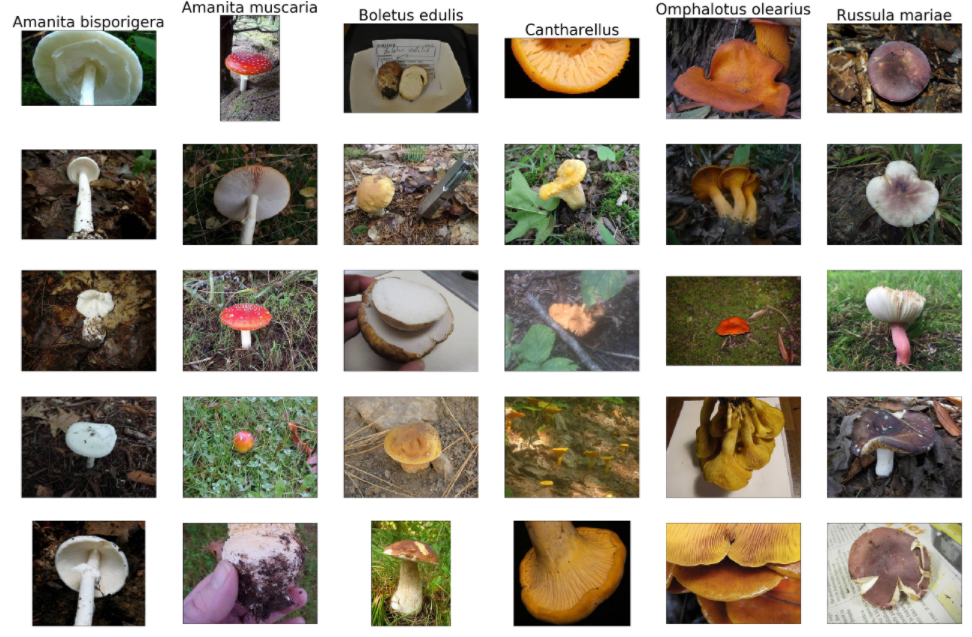

<b>Figure 3: </b>The above figure shows 5 randomly sampled images from the data set for each species, as shown in each column.

## Image Sizing and Augmentation
---

First, the convolutional neural network models require a constant image size as input. These images are fed into the model with all three of the color channels (red, green, and blue). However, each image varies in pixel size. The chart below shows the ranges in image size. When choosing how to size the images for input into the convoluational neural network models, I wanted to keep the median height to width ratio in mind, so that the majority of images will have minimal shrinkage or expansion problems, meaning that the pixels along either the height or width axis aren't shrunk or expanded so drastically, so that the images don't look distorted. The chart below shows that the median height to width ratio is ~0.75 and that on average, the images are about 250 pixels tall and 300 pixels wide.<br>
In order to keep the image sizes down, and thus allowing faster training and predicting time (a restaurant is a very fast paced environment), I have chosen an image input size just below average, maintaining the median height to width ratio. The image input size will be 250 pixels wide and 187 pixels tall.

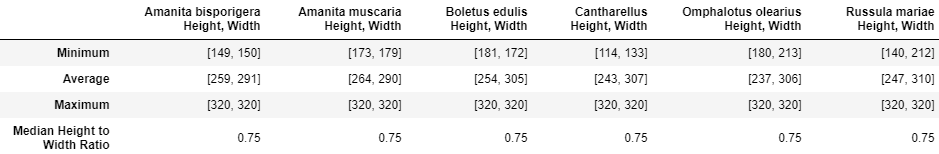

<b>Figure 4: </b>The above chart shows the distribution of the image sizes. On average, the images are ~250 pixels tall and ~300 pixels wide. Also, the median height to width ratios tell us that we can expect a lot of images to be only 75% as tall as they are wide.

In order to generate more images to train the model on, and to help avoid overfitting, augmentation was applied to the training images. The augmentation applied consists of random rotations within the range of 40 degrees, random shifts along the width axis of the image up to 15% of the total image width, random shifts along the height axis of the image up to 15% of the total image height, random distortions of a shear angle up to 15% (simulates a picture being taken from different perspectives), random zooms of up to 20% in either direction (zooming in or out), and flips along the horizontal axis of the image. Examples of applying this data augmentation to an image are shown below.

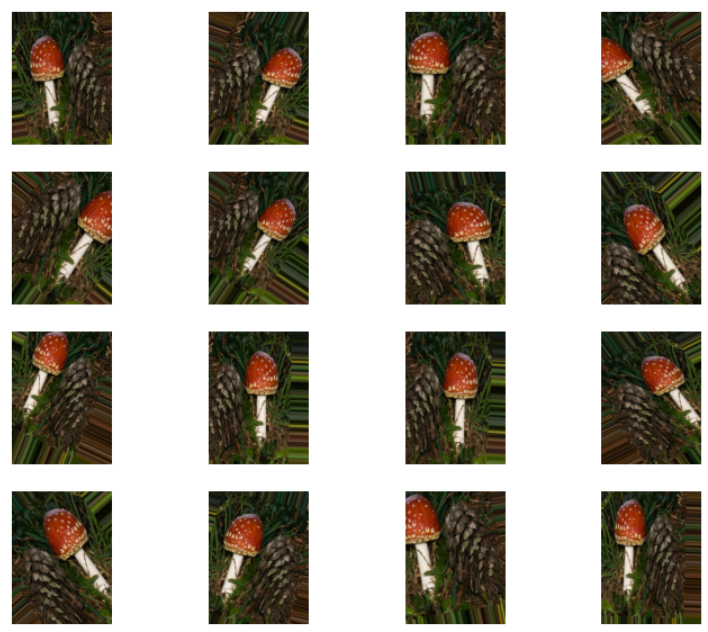

<b>Figure 5: </b>The above figure shows the impact of the augmentation on a sample image. The augmentation includes random width and height shifts, zooming, shear angle manipulations, rotations, and horizontal axis flips.

## Modeling
---

Various common architectures of convolutional neural network models (CNN models) were used on these images. In particular, Xception, ResNet50, and MobileNetV2 were explored. I chose to explore Xception due to it's exceptionally high top-5 accuracy on the ImageNet data set while only consisting of 22.9 M weights. I explored ResNet50 simply because I had seen someone else using it on a different mushroom image classification problem and got good results. However, it is a slightly more complex model, containing 25.6 M weights. Lastly, I explored MobileNetV2 because of it's exceptional simplicity, containing only 3.5 M weights, while still having a top-5 accuracy of 90.1%.<br>
I started out by training a ResNet50 architectures from scratch, only using the mushroom images data. Before feeding the images into the model for training, the channels are scaled down from a 0-255 range to a range from 0 - 1. Then, the images are fed into each model for training in batches of 20 images. When training the models, I realized that since the Cantharellus species image set has many more images that any other species, the model was starting out by only classifying each image as Cantharellus. In order to avoid this, I put a cap on how many images from each species could be used in this project. I chose a cap of 500 images. Then, after training and selecting the best model, I applied data augmentation to further train the model, and selected a final model. The final model had a training accuracy of 74% and a validation accuracy of 76%. The validation accuracy was very volatile from epoch to epoch. This can be seen in the figure below.<br>

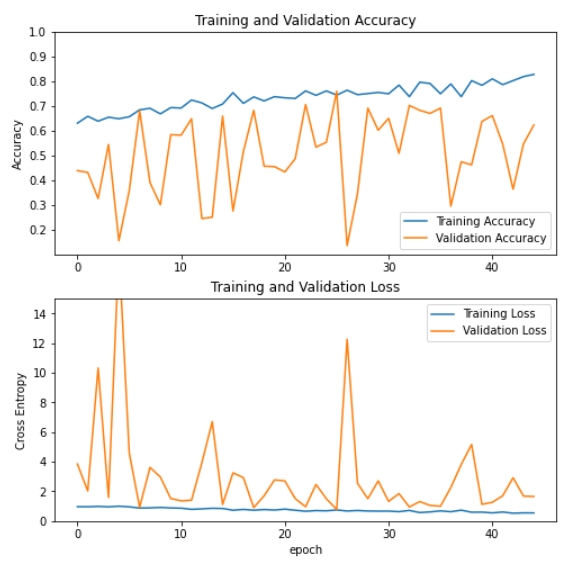

<b>Figure 6: </b> This figure shows the training and validation accuracy and loss at each training epoch when training the ResNet50 architecture from scratch. The validation accuracy and loss are both very volatile.

Realizing that this data set is small, I didn't fit any more models from scratch. Instead, I fit a ResNet50, Xception, and MobileNet V2 model architecture with weights pre-trained to the ImageNet dataset. Since MobileNet V2 works best with square images and a width that is a multiple of 32, I decided to change the input image size to 192 pixels tall and 192 pixels wide. Since I am comparing the results from all of these models, this input shape is used for each of the three architectures.<br>
I started out by only loading the weights for the core layers (everything except the top global average pooling and dense classification layer). The necessary preprocessing layer for each model was applied to the front of the core model layers in order to scale / standardize the images as they come in. Then, a global average pooling layer is applied to the end of the core architecture layers. Next, I found that applying a dense layer of 1,024 units and a relu activation function, followed by a dropout of 50%, and another dense layer with 512 units and a relu activation function followed by another dropout of 50% topped off with a batch normalization layer that feeds into the final dense classification layer with 6 units and a softmax activation function yielded the best validation accuracy. I am thinking that since the features of a mushroom are complex and look similar across different species, the extra two dense layers may be useful in classifying the mushrooms based off the features the CNN architecture layers found. The validation accuracy proved this to be true. The model architecture can be seen below. The core architectures were frozen while the layers added to the top were left trainable. These unfrozen layers were then trained on the mushroom images (including data augmentation) using a learning rate of 0.0003. <br>
For all model compilations, the adams optimizer, categorical cross entropy loss function, and accuracy metric was used.

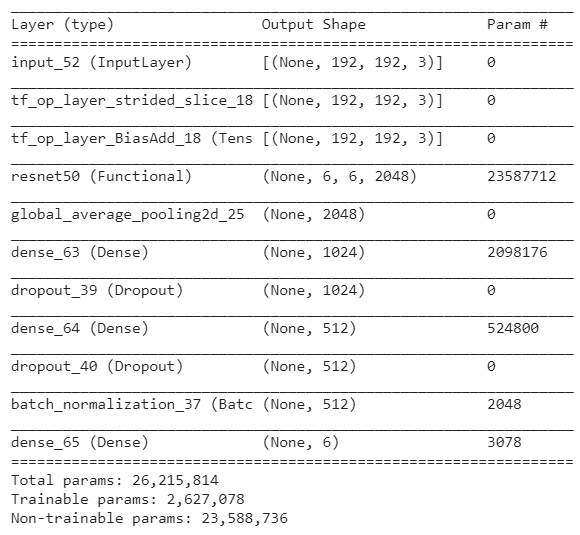

<b>Figure 7: </b>The above figure shows the summary of the ResNet50 model architecture implemented in this project. The take away for this figure is that for a CNN architecture, an input is fed through a preprocessing layer before going into the main underlying architecture layers. Then, the underlying architecture results are fed through a global average pooling layer to flatten the output. Then, a dense layer, followed by a drop out of 50%, followed by another dense layer, followed by a drop out of 50%, followed by a batch normalization layer, topped off with a dense layer with 6 units and a softmax activation function is added on top of the underlying architecture's layers.

After selecting the best model trained from each CNN architecture, I chose the ResNet50 model because it had a validation accuracy of 90.3% and a training accuracy of 96.8%. The training accuracy is higher than I would like to see in relation to the validation accuracy, but when training on that epoch, the training accuracy was only 90%. This must be due to the fact that the 90% figure was acheived from training on augmented data, but the 96.8% training accuracy was acheived evaluating the model only using the non-augmented training data. The comparison of training and validation accuracy for each CNN architecture is shown below.

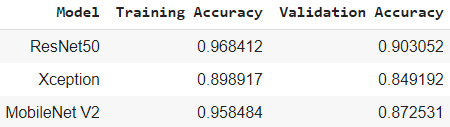

<b>Figure 8: </b>The above figure shows the training and validation accuracy acheived when evaluating the best models from each of the chosen CNN architectures. The ResNet50 was chosen due to it having the highest validation accuracy. It is important to note that the training accuracies are inflated compared to the training accuracies yielded during training because these figures above are evaluated without using augmented data, but when training, augmented data was used.

Lastly, fine tuning was applied to the ResNet50 model. In order to get any noticeable increases in validation accuracy, the top 75 layers needed to be unfrozen for training. Training was done with a learning rate of 0.000003. If any fewer layers were unfrozen then the validation accuracy would stay constant. If any more layers were unfrozen, the validation error would get more volatile. The results from 50 epochs of this fine-tuning are shown below. Both the training accuracy and validation accuracy initially increased, but at 12 epochs, the validation accuracy stopped increasing, while the training accuracy kept going. Therefore, the final model I selected is the model with 12 epochs of this fine-tuning. Here, the validation accuracy is 92.4% and the data augmented training accuracy is 95.3%. The validation accuracy has increased by 2.1% from fine-tuning.

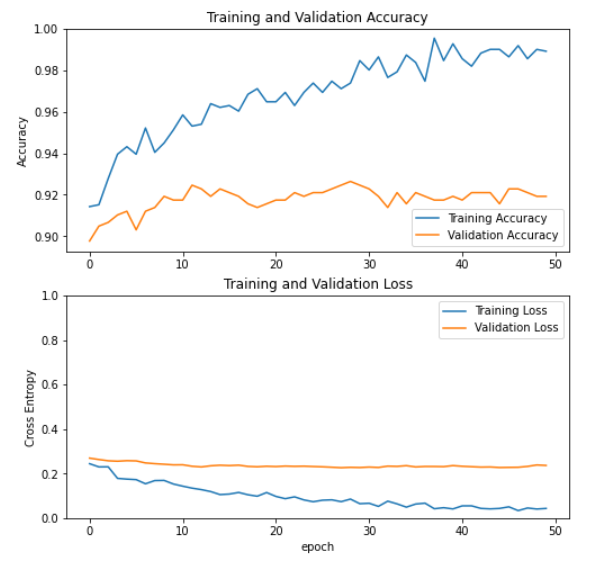

<b>Figure 9: </b>This figure shows the changes in validation and training accuracy with each additional epoch of fine-tuning training with a learning rate of 0.000003. The validation accuracy has it's peak at 12 epochs of training.

## Model Evaluation and Selection
---

The final model selected was tested on a test sample of 419 images. The predictions yielded a 93.1% accuracy rate. The confusion matrix for the predictions are shown in the figure below. The misclassifications are sparse on the confusion matrix. However, misclassifications are very important in mushroom identification, so the model was evaluated further. 

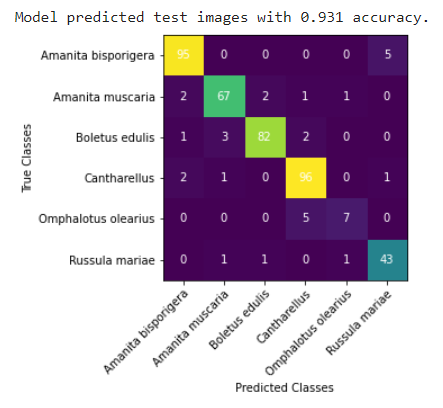

<b>Figure 10: </b>The figure shows a confusion matrix from the predictions of 419 test images. The test predictions yielded a 93.1% accuracy.

The best 9 predictions (predictions with the highest prediction probability) are shown below. Something all of these images have in common is that they show both the stem and head of the mushroom and the mushroom is the main focus/takes up the majority of the image. Most of these images also show the top of the head of the mushroom, while some of the images show the bottom too.

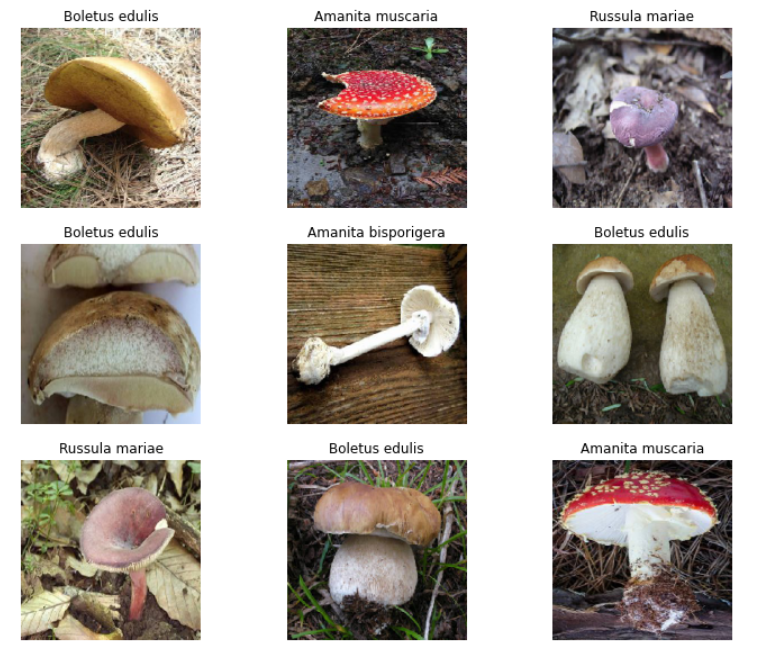

<b>Figure 11: </b>This figure shows the 9 images with the highest prediction probabilities on the test images. 

The worst 9 predictions (predictions with lowest prediction probability) are shown below. Somethings to note about these images is that 4 of them don't show the top of the mushroom. Two of the images have mushrooms that are far away from the camera. One of the pictures shows what looks like a rotten mushroom. It seems like the quality of a prediction is dependent on the quality of the picture and the angle the mushrooms picture is taken from.

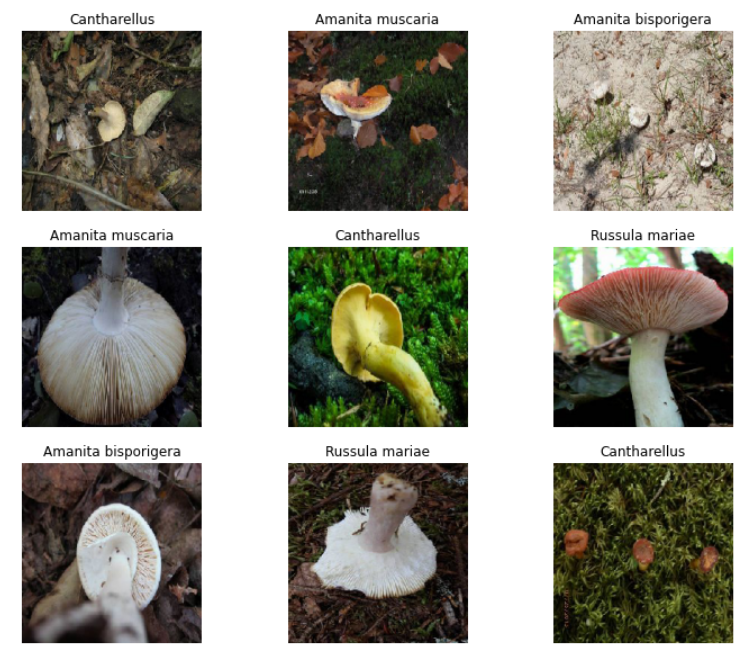

<b>Figure 12: </b>This figure shows the images with the lowest prediction probabilities on the test images.

In practice, you don't need to have a classification for every mushroom. It is ok to throw away an occasional mushroom if the model isn't very sure of its prediction. This could also help weed out rotten mushrooms. Thereore, I added an additional step where the prediction probability must be greater than or equal to 75% to be considered for classification. The test accuracy results are shown below in the confusion matrix.

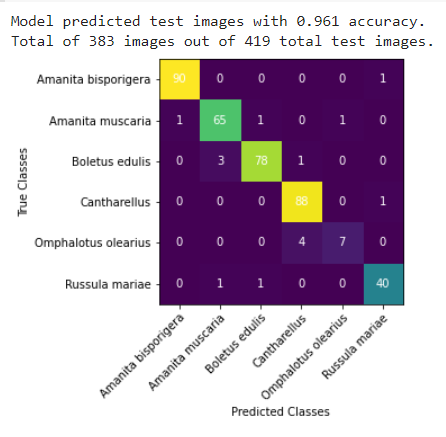

<b>Figure 13: </b>This figure shows the results of adding a 75% prediction accuracy requirement for classification consideration. Out of the 419 images, 383 were left having a prediction probability over 75%.

It looks like adding the extra step of requiring an image to have atleast a 75% probability for the class it is assigned to really helped out. It increased the accuracy in the test image by 3%! However, in this test set, 8.6% of the mushrooms were determined as 'not classified', which in this projects context would mean getting thrown out (lost profit).

## Conclusion and Interpretation
---

In conclusion, I would expect this model to classify mushroom images with 92.4% accuracy. This is seen through the validation accuracy of the final model. When tested on images the model has never seen before, it predicted mushroom species with 93.1% accuracy. However, as seen in figure 9, the validation accuracy is a little bit volatile in the fine-tuning. Therefore, I wouldn't be surprised to see this model perform above or below 92.4% by a few percent on future images (similar to how it overperformed on the test set, this variance could cause it to underperform on other image sets).<br>
However, after implementing a checkpoint of a mushroom image having a prediction probability higher than 75%, the accuracy is expected to increase (3% on the test images in this project). This checkpoint is important because just like when harvesting mushrooms in the forest, if you have uncertainty in a mushroom classification, it is best to leave it and not take the chance. Also, in the restaurant setting for this project, a mushroom harvester may have brought in a mushroom that doesn't belong to either of the 6 species this model classifies. In this case, the model would still assign a classification, but I would expect the classification would have a low prediction probability, getting caught under the 75% threshold.

When studying the confusion matrix in figure 13, it looks like the model has a hard time distinguishing between Cantharellus and its poisonous look-a-like Omphalotus olearius. This is probably mainly due to the small sample of images for this species. Also, there is 1 poisonous Amanita Bisporigera that was misclassified as an edible Russula Mariae. Lastly, there are other misclassifications, but no more that misclassified a poisonous mushroom as edible. It is good to see that not a single mushroom classified as Amanita Muscaria was actually it's deadly look-a-like Amanita Bisporigera.<br>

Overall, this model has yielded pretty good image classification, but under the context of classifying these mushrooms before feeding them to customers, I don't think that the 96% test accuracy is high enough, when the consequnce of feeding someone a poisonous mushroom is so high. This model needs more work as discussed next in the limitations and future additions section.

## Limitations and Future Additions
---

The big limitation of this model is the inability to consistently distinguish between Cantharellus and its poisonous look-a-like Omphalotus olearius as well as the example of the deadly Amanita Bisporigera being incorrectly classified as an edible species. If this is happening on a test prediction with only 419 mushrooms, then this would be a real issue for a restaurant that is cooking hundreds of mushrooms every day.<br>
Another limitation is that the data used in this project is generated from users. Therefore, the accuracy of this model also depends on the accuracy of the users in classifying mushrooms. Also, since the pictures are generated from a variety of users, the quality of the pictures as well as the angles and parts of the mushrooms shown in each picture varies from image to image. I'm sure this is a limitation to the accuracy this model can acheive, because some images don't show enough parts necessary to classify a mushroom.

Based on these limitations, a good future addition may be hiring a mushroom classification professional and have them verify the mushroom classifications for a few weeks. As they record the classifications, the mushrooms can be sent down a conveyor belt where a camera will take a picture of them (this is how pictures would be taken for generating a model prediction in application) from the necessary angle. These images will be tagged with their labels from the professional mushroom classifier and saved in a database. After a few weeks, thousands of pictures of reliably classified mushroom pictures (all taken with the same quality and angle that would be used in application) would have been generated, allowing for a much more reliable model. 